<a href="https://colab.research.google.com/github/1799mrd/ML-Diploma_work/blob/main/ReginaMD_ML_Diploma_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дипломный проект Мухаметшиной Регины

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns

from sklearn.metrics import matthews_corrcoef

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, IsolationForest
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [2]:
breast_cancer = datasets.load_breast_cancer()

#### load_breast_cancer() не возвращает данные в табличном формате. Вместо этого передается нам объект Bunch (словарь).
Предоставленный Sklearn словарь Bunch — достаточно мощный инструмент. Узнаю какие ключи нам доступны.

In [3]:
print(breast_cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Получаем следующие ключи:

data — это необходимые для предсказания данные (показатели, полученные при сканировании, такие как радиус, площадь и другие) в массиве NumPy.
target — это целевые данные (переменная, которую вы хотите предсказать, в данном случае является ли опухоль злокачественной или доброкачественной) в массиве NumPy.
Значения этих двух ключей предоставляют нам необходимые для обучения данные. Остальные ключи имеют пояснительное предназначение. Важно отметить, что все датасеты в Scikit-Learn разделены на data и target. data представляет собой показатели, переменные, которые используются моделью для тренировки. target включает в себя фактические метки классов. В нашем случае целевые данные — это один столбец, в котором опухоль классифицируется как 0 (злокачественная) или 1 (доброкачественная).

feature_names — это названия показателей, другими словами, имена столбцов в data.
target_names — это имя целевой переменной или переменных, другими словами, название целевого столбца или столбцов.
DESCR — сокращение от DESCRIPTION, представляет собой описание выборки.
filename — это путь к файлу с данными в формате CSV.

Чтобы посмотреть значение ключа, можно ввести data.KEYNAME, где KEYNAME — интересующий ключ.

In [4]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Итак, описание датасета:

In [5]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### Считывание Датафрейма

In [6]:
# Считаю DataFrame
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# Добавлю столбец "target" и заполню его данными.
df['target'] = breast_cancer.target
# Посмотрим первые пять строк
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Знакомство с данными, обработка пропусков и выбросов

Исследуем пропущенные значения

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Нет пропущенных данных, все столбцы содержат 569 значений. Это избавляет нас от необходимости учитывать отсутствующие значения.
Все типы данных числовые.

Изучу признак, отображающий mean radius, на предмет выбросов. Удалю все выбросы, воспользовавшись методом Тьюки.



In [8]:
df['mean radius'].describe(include=['float64'])

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

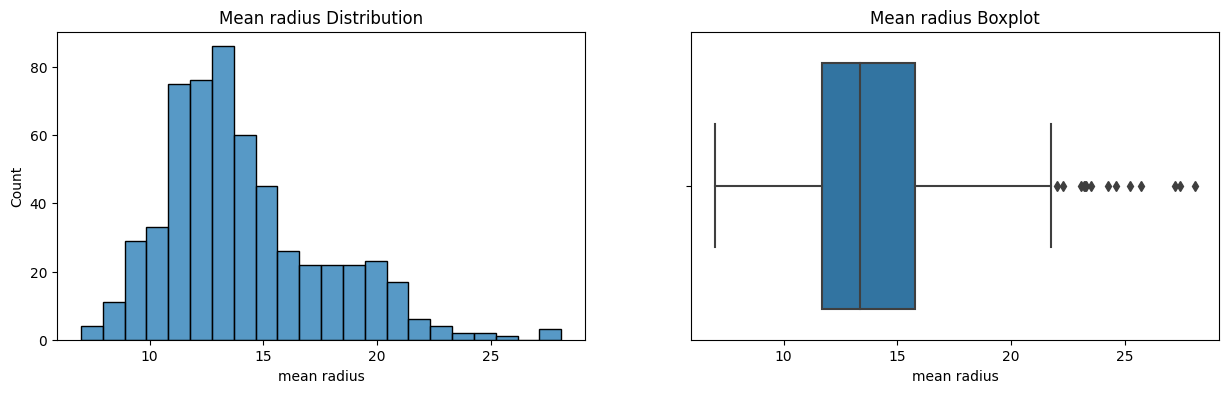

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='mean radius', ax=axes[0]);
histplot.set_title('Mean radius Distribution');
boxplot = sns.boxplot(data=df, x='mean radius', ax=axes[1]);
boxplot.set_title('Mean radius Boxplot');

In [24]:
Q1 = np.percentile(df['mean radius'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['mean radius'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

cleaned = df[(df['mean radius']>=lower)&(df['mean radius']<=upper)]
cleaned.shape

(555, 31)

## Разведывательный анализ

Изучу соотношение классов в данных на предмет несбалансированности, проиллюстрирую результат

In [11]:
cleaned['target'].value_counts()

1    357
0    198
Name: target, dtype: int64

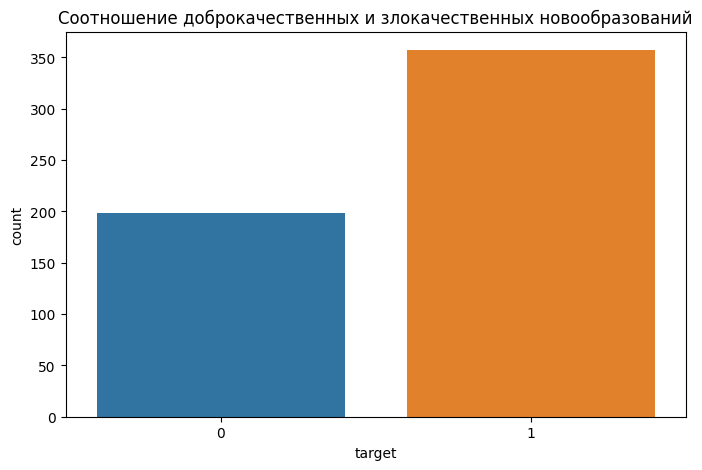

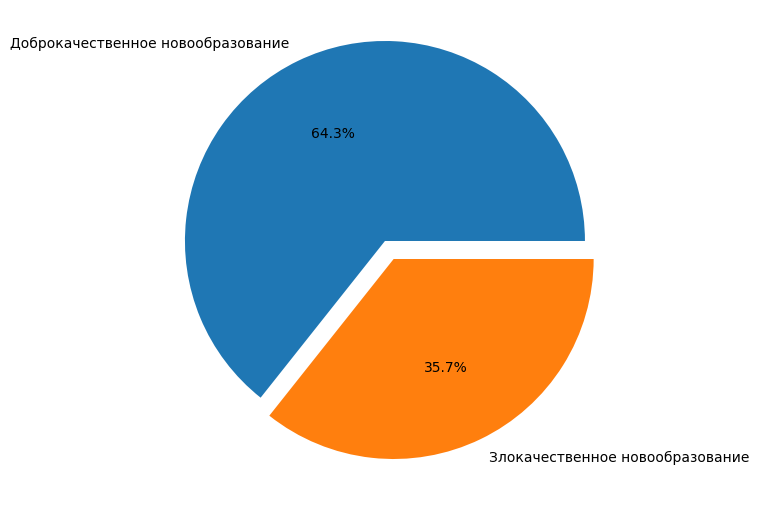

In [47]:
exited_people = cleaned['target'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(data=cleaned, x='target')
plt.title('Соотношение доброкачественных и злокачественных новообразований')
plt.show()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_people,
    labels= ['Доброкачественное новообразование', 'Злокачественное новообразование'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);


Опухоль, которая классифицируется как 0 (злокачественная) примерно в 1.8 раз встречается реже, чем 1 (доброкачественная).

### Корреляция

<Axes: >

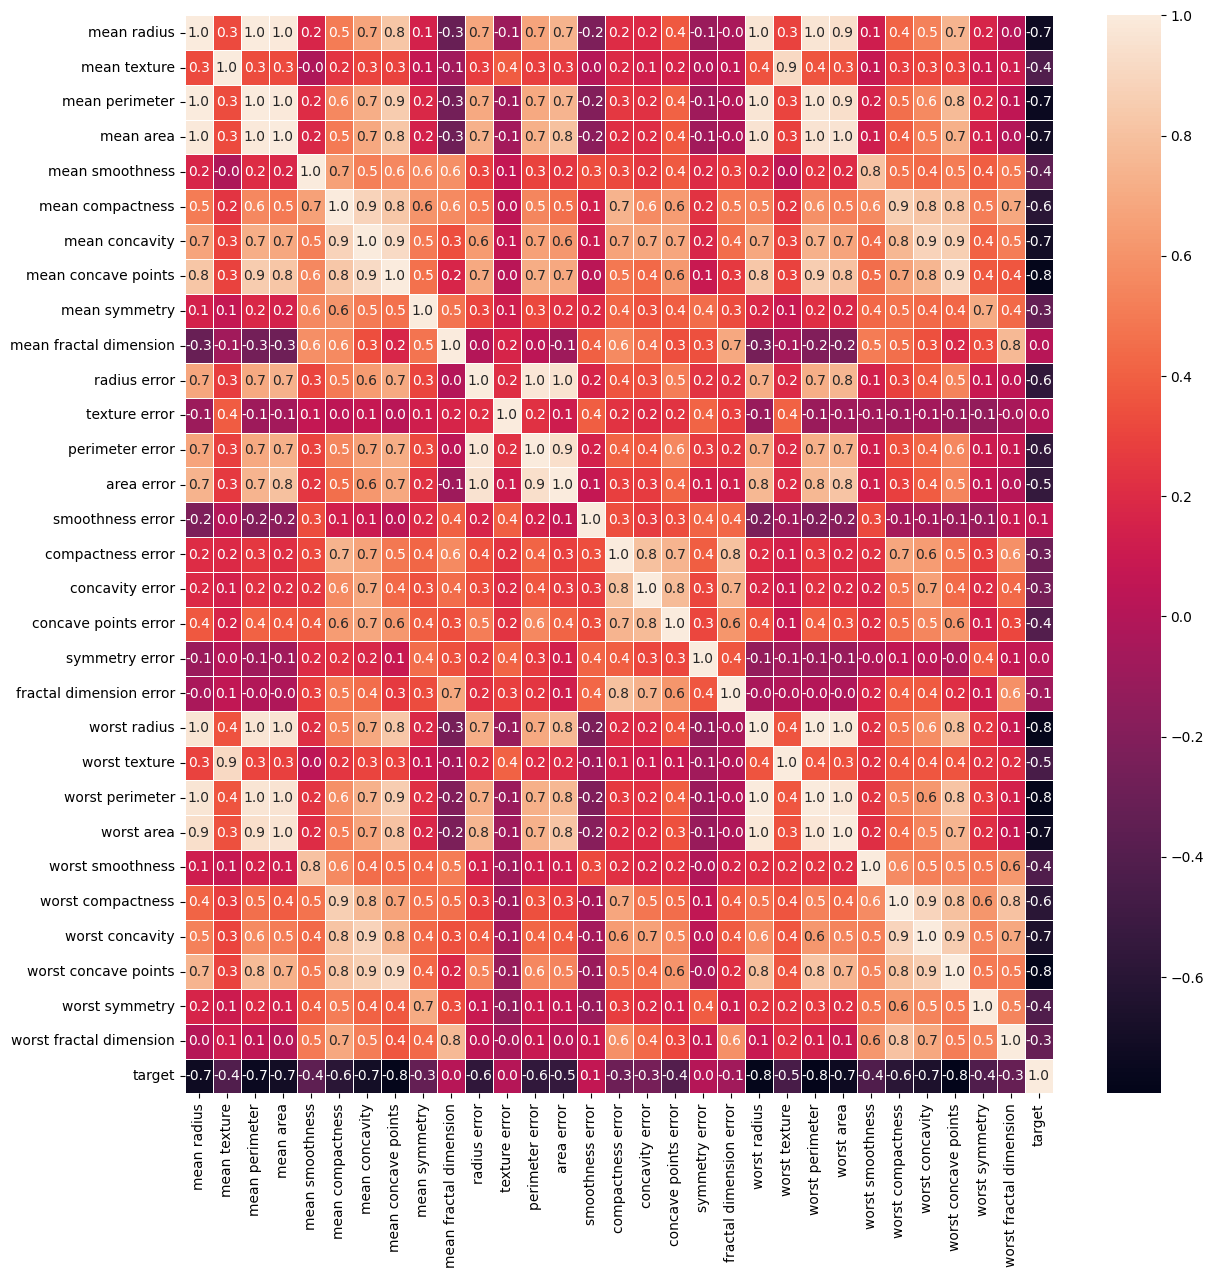

In [14]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

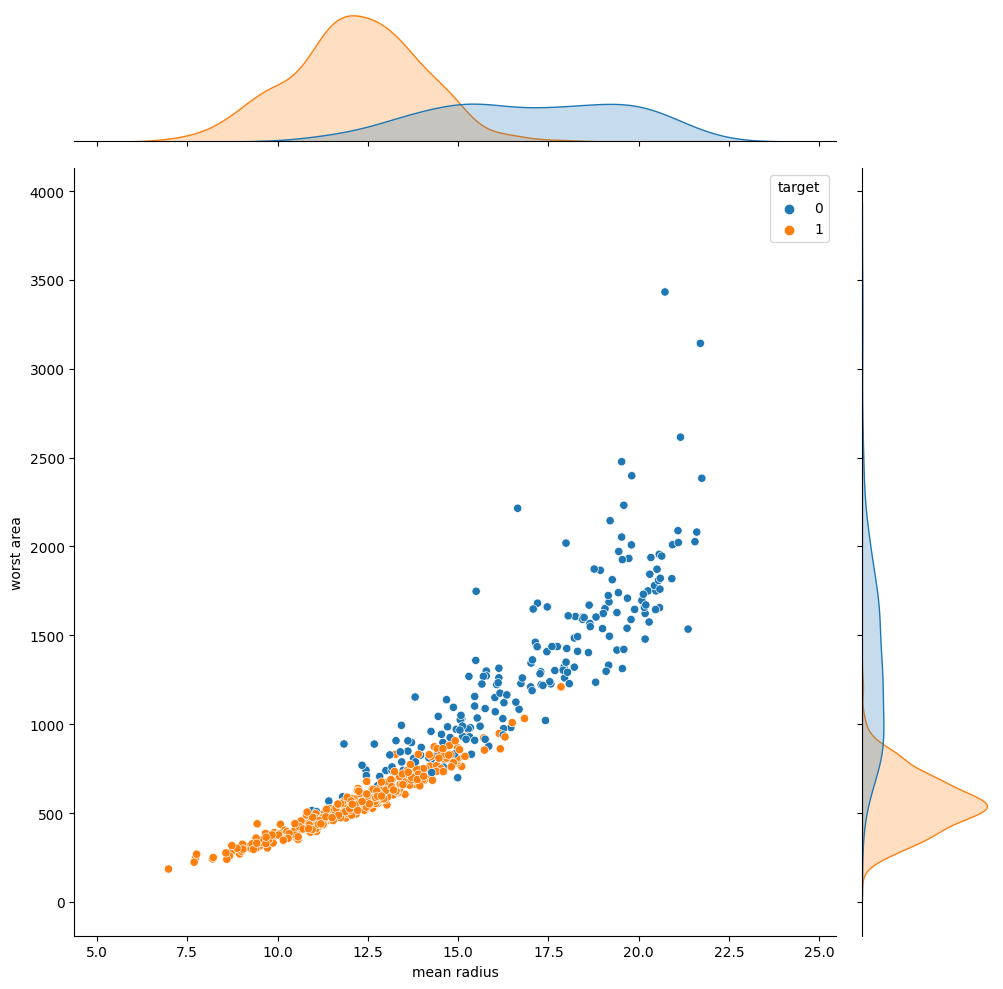

In [15]:
jointplot = sns.jointplot(
    data=cleaned,
    x='mean radius',
    y='worst area',
    hue='target',
    height=10,
)

В данном датасете много высококореллированных данных. Удалю некоторые элементы

In [16]:
drop_list = ['mean perimeter','mean radius','mean compactness','mean concavity','radius error','area error','perimeter error','worst radius','worst perimeter','worst compactness','worst concavity','worst fractal dimension','compactness error','concavity error','worst concavity','worst smoothness','worst texture','worst area']
df_x = df.drop(drop_list, axis = 1)
df_x.head()

,mean texture,mean area,mean smoothness,mean concave points,mean symmetry,mean fractal dimension,texture error,smoothness error,concave points error,symmetry error,fractal dimension error,worst concave points,worst symmetry,target
0,10.38,1001.0,0.11840,0.14710,0.2419,0.07871,0.9053,0.006399,0.01587,0.03003,0.006193,0.2654,0.4601,0
1,17.77,1326.0,0.08474,0.07017,0.1812,0.05667,0.7339,0.005225,0.01340,0.01389,0.003532,0.1860,0.2750,0
2,21.25,1203.0,0.10960,0.12790,0.2069,0.05999,0.7869,0.006150,0.02058,0.02250,0.004571,0.2430,0.3613,0
3,20.38,386.1,0.14250,0.10520,0.2597,0.09744,1.1560,0.009110,0.01867,0.05963,0.009208,0.2575,0.6638,0
4,14.34,1297.0,0.10030,0.10430,0.1809,0.05883,0.7813,0.011490,0.01885,0.01756,0.005115,0.1625,0.2364,0


<Axes: >

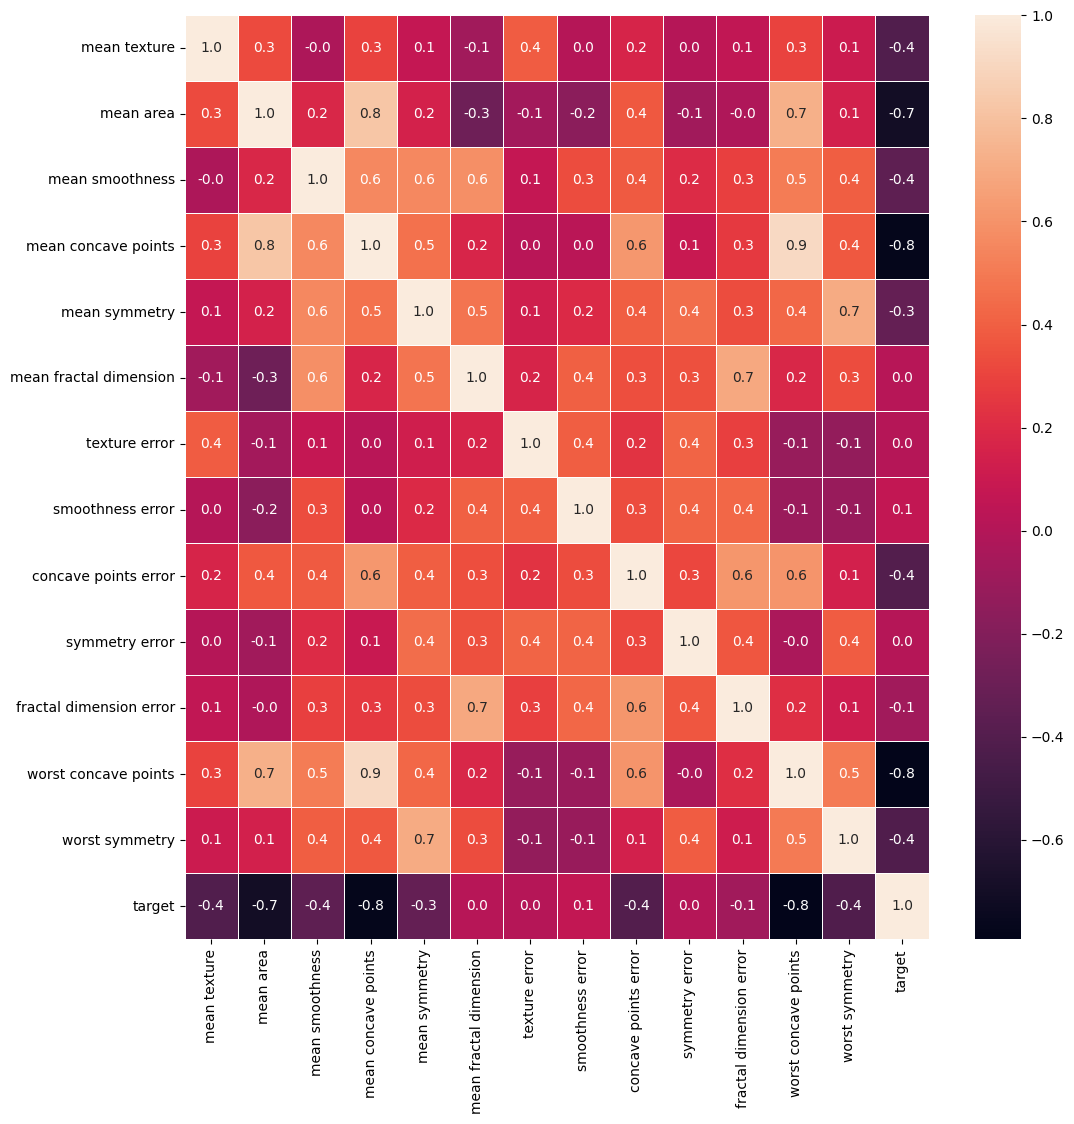

In [17]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Обучение модели
Далее построю модель, которая классифицирует раковые опухоли как злокачественные и доброкачественные. Построю простую модель K-ближайших соседей.

Во-первых, разделю выборку на две: одну для тренировки модели — предоставление ей данных для обучения, а вторую — для тестирования, чтобы посмотреть, насколько хорошо модель работает с данными (результаты сканирования), которые она раньше не видела.

In [18]:
X = breast_cancer.data
y = breast_cancer.target
# разделю данные с помощью Scikit-Learn's train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Это дало два датасета — один для обучения и один для тестирования.

Тренировка модели.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
logreg = KNeighborsClassifier(n_neighbors=6)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9230769230769231

Получили на выходе 0.95. Это означает, что модель точна на 94%

##Качество Bagging с различными базовыми моделями

Попробую оценить эффект бэггинга на качестве различных моделей классификации: логистической регрессии, SVC и дерева решений.


Обучу `BaggingClassifier` (предварительно почитав [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)) с теми же самыми моделями в качестве базового эстиматора и числом эстиматоров равным 100.

На новом графике отображу боксплоты для всех моделей.

In [20]:
def bootstrap_metric(x, y,
                    metric_fn,
                    samples_cnt=1000,
                    random_state=777):
    size = len(x)
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(x.shape[0], size=x.shape[0], replace=True)

        x_boot = x[poses]
        y_boot = y[poses]

        m_val = metric_fn(x_boot, y_boot)
        b_metric[it] = m_val

    return b_metric

In [21]:
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)

In [ ]:
import scipy
import numpy as np
import pandas as pd

import itertools
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import matthews_corrcoef

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV, train_test_split

На датасете `breast_cancer` обучаю модели Decision Tree, SVC (с параметрами по умолчанию) и логистическую регрессию.

In [27]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [29]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
logr_model = LogisticRegression(solver='liblinear', max_iter=1000)
logr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

lgbm_model = LGBMClassifier(verbose=-1)
lgbm_model.fit(X_train, y_train)

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Полученные предсказания на тесте оцениваю при помощи корреляции Мэттьюса (`sklearn.metrics.matthews_corrcoef`), построив 90% доверительные интервалы при помощи реализующей bootstrap функции `bootstrap_metric`. Результат отображу в виде боксплотов.

In [35]:
dt_pred = dt_model.predict(X_test)
svc_pred = svc_model.predict(X_test)
logr_pred = logr_model.predict(X_test)
LGBMClass = lgbm_model.predict(X_test)

In [38]:
matthews_m = lambda x, y: matthews_corrcoef(y_true=x, y_pred=y)

boot_score_dt = bootstrap_metric(y_test, dt_pred, metric_fn=matthews_m)
boot_score_svc = bootstrap_metric(y_test, svc_pred, metric_fn=matthews_m)
boot_score_logr = bootstrap_metric(y_test, logr_pred, metric_fn=matthews_m)
boot_score_lgbm = bootstrap_metric(y_test, LGBMClass, metric_fn=matthews_m)

In [39]:
scores = pd.DataFrame({"DecTree": boot_score_dt,
                       "SVC": boot_score_svc,
                       "LogReg": boot_score_logr,
                       "Lgbm": boot_score_lgbm})
scores_melt = pd.melt(scores, var_name="Model", value_name="Score")
scores_melt

,Model,Score
0,DecTree,0.902320
1,DecTree,0.880970
2,DecTree,0.751628
3,DecTree,0.805979
4,DecTree,0.820675
...,...,...
3995,Lgbm,0.920451
3996,Lgbm,0.937098
3997,Lgbm,0.882387
3998,Lgbm,0.952321


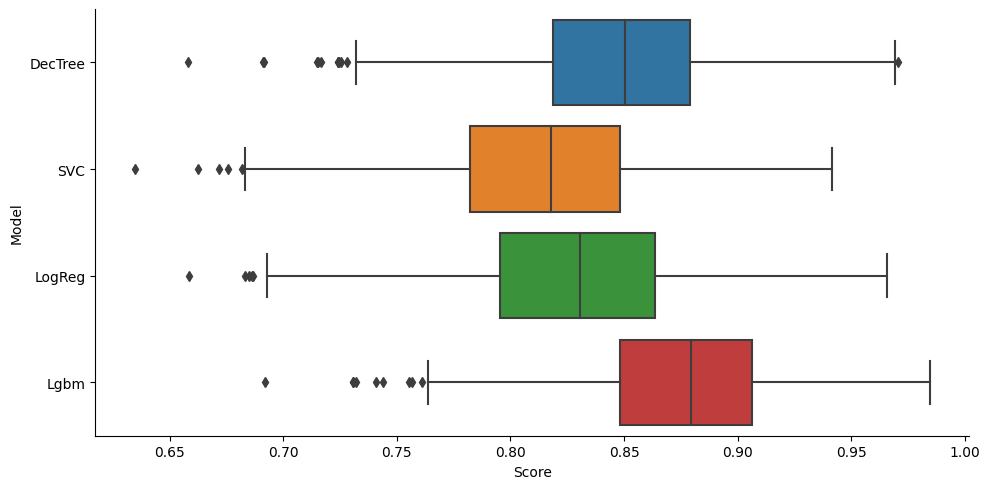

In [40]:
sns.catplot(data=scores_melt, x="Score", y="Model", kind="box", aspect=2)
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix, accuracy_score

In [ ]:
best_models = lgbm_model.fit(X_train, y_train)

In [43]:
y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.96      0.96      0.96        94

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



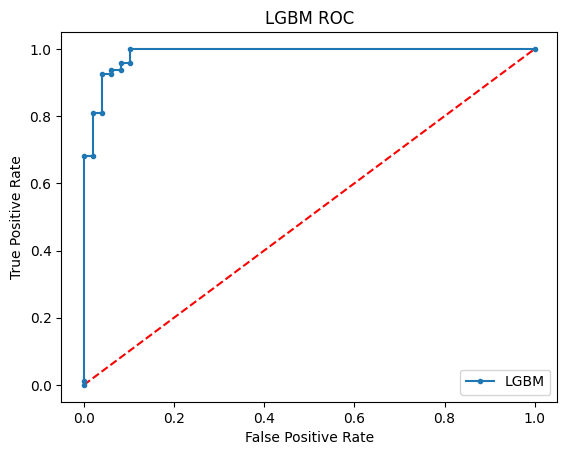

In [44]:
lgbm_roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, marker='.', label='LGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("LGBM ROC")
plt.legend()
plt.show()

In [45]:
y_pred = logr_model.predict(X_test)
y_prob = logr_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        49
           1       0.93      0.96      0.94        94

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



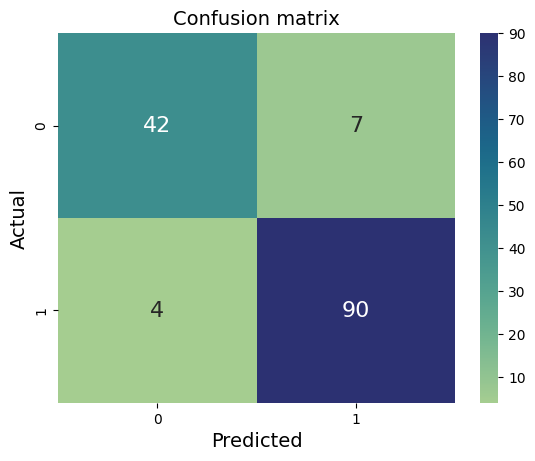

In [46]:
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),
                annot=True,
                cmap="crest",
                annot_kws={"size": 16})
plt.title('Confusion matrix', size=14)
plt.ylabel('Actual', size=14)
plt.xlabel('Predicted', size=14);

Создаю ансамбли `BaggingClassifier` с рассмотренными выше моделями в качестве базовых эстиматоров и числом эстиматоров равным 100. Получу для каждого из них предсказание и bootstrap-оценку. Добавлю полученные данные на график.

In [51]:
bagged_svc_model = BaggingClassifier(SVC(), n_estimators=100)
bagged_svc_model.fit(X_train, y_train)

bagged_dt_model =BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)
bagged_dt_model.fit(X_train, y_train)

bagged_logr_model = BaggingClassifier(LogisticRegression(solver = "liblinear",
                                                         max_iter=1000),
                                      n_estimators=100)
bagged_logr_model.fit(X_train, y_train)

bagged_lgbm_model = BaggingClassifier(LGBMClassifier(verbose=-1), n_estimators=100)
bagged_lgbm_model.fit(X_train, y_train)

BaggingClassifier(estimator=LGBMClassifier(verbose=-1), n_estimators=100)

In [52]:
b_dt_pred = bagged_dt_model.predict(X_test)
b_svc_pred = bagged_svc_model.predict(X_test)
b_logr_pred = bagged_logr_model.predict(X_test)
b_lgbm_pred = bagged_lgbm_model.predict(X_test)

In [53]:
matthews_m = lambda x, y: matthews_corrcoef(y_true=x, y_pred=y)

b_boot_score_dt = bootstrap_metric(y_test, b_dt_pred, metric_fn =matthews_m)
b_boot_score_svc = bootstrap_metric(y_test, b_svc_pred, metric_fn =matthews_m)
b_boot_score_logr = bootstrap_metric(y_test, b_logr_pred, metric_fn =matthews_m)
b_boot_score_lgbm = bootstrap_metric(y_test, b_lgbm_pred, metric_fn =matthews_m)

In [54]:
all_scores = pd.DataFrame({"DecTree": boot_score_dt,
                          "SVC": boot_score_svc,
                          "LogReg": boot_score_logr,
                           "Lgbm": boot_score_lgbm,
                          "Bagged DecTree":b_boot_score_dt,
                          "Bagged SVC": b_boot_score_svc,
                          "Bagged LogReg": b_boot_score_logr,
                           "Bagged LgbmClass": b_boot_score_lgbm})
all_scores_melt = pd.melt(all_scores, var_name="Model", value_name="Score")
all_scores_melt

,Model,Score
0,DecTree,0.902320
1,DecTree,0.880970
2,DecTree,0.751628
3,DecTree,0.805979
4,DecTree,0.820675
...,...,...
7995,Bagged LgbmClass,0.920451
7996,Bagged LgbmClass,0.937098
7997,Bagged LgbmClass,0.882387
7998,Bagged LgbmClass,0.952321


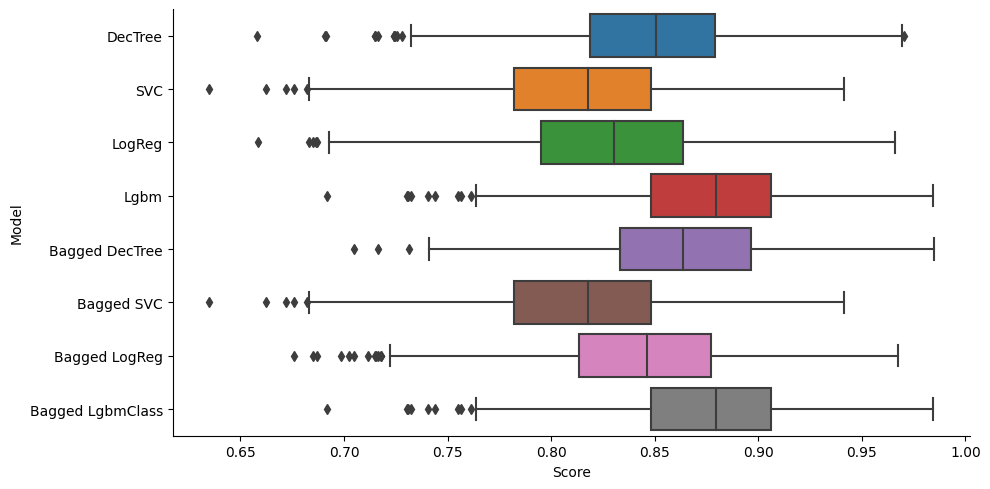

In [55]:
sns.catplot(data=all_scores_melt, x="Score", y="Model", kind="box", aspect=2)
plt.show()

Чтобы использовать бэггинг как ансанбль нужно использовать сильные модели, которые могут полностью или почти полностью выучить обучающую выборку.

Дерево от бэггинга стало лучше предсказывать, чем до этого предсказывало обычное дерево. Также и с логистической регрессией. Результаты с бэггингом на дереве и логистической регрессии будут лучше, так как отдельные параметры, которые предсказывались неправильно в какие-то моменты будут определяться правильно.

Бэггинг на SVC не меняется и не работает. Так как при бэггинге и без него SVC будет ошибаться в одних и тех же местах, когда находятся далеко от разделяющей плоскости.

Вывод - бэггинг не особо полезен для SVC или lgbm, но полезен для дерева и логистической регрессии.

In [ ]:
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
# define Boruta feature selection method
cls = RandomForestClassifier(n_estimators=100, n_jobs=2)
feat_selector = BorutaPy(cls,
                         two_step=False,
                         n_estimators=100,
                         perc = 90,
                         verbose=2,
                         random_state=42)

In [ ]:
feat_selector.fit(X_train, (y_train == 1))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	0
I

BorutaPy(estimator=RandomForestClassifier(n_jobs=2,
                                          random_state=RandomState(MT19937) at 0x796301B15440),
         n_estimators=100, perc=90,
         random_state=RandomState(MT19937) at 0x796301B15440, two_step=False,
         verbose=2)

In [ ]:
fetch = BorutaPy(cls,
                 two_step=False,
                 n_estimators=100,
                 perc = 90,
                 verbose=2,
                 random_state=42)
fetch.fit(X_train, y_train)
fetch.support_
fetch.ranking_
X_filtered = fetch.transform(X_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	8
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	0
I

In [ ]:
feat_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Все значения важны